<a href="https://colab.research.google.com/github/TytanMikJas/ML-Data-Analysis-Project/blob/main/Netflix_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports:**

In [1]:
# Data structures
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

#models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Loading up the data

In [2]:
df = pd.read_csv("titles.csv")

# Data analisys

The dataset 'titles.csv' consists of 15 columns.
* id: The title ID on JustWatch.
* title: The name of the title.
* show_type: TV show or movie.
* description: A brief description.
* release_year: The release year.
* age_certification: The age certification.
* runtime: The length of the episode (SHOW) or movie.
* genres: A list of genres.
* production_countries: A list of countries that produced the title.
* seasons: Number of seasons if it's a SHOW.
* imdb_id: The title ID on IMDB.
* imdb_score: Score on IMDB.
* imdb_votes: Votes on IMDB.
* tmdb_popularity: Popularity on TMDB.
* tmdb_score: Score on TMDB.

In [3]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


# Check for missing data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [5]:
df.isnull().sum().sort_values()

id                         0
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
title                      1
description               18
tmdb_popularity           94
tmdb_score               318
imdb_id                  444
imdb_score               523
imdb_votes               539
age_certification       2610
seasons                 3759
dtype: int64

**There are 9 collumns with missing data**

The number of missing values:
* title 1 of 5806
* description 18 of 5860
* age_certification 2610 of 5860
* sesons 3759 of 5860
* imdb_id 444 of 5860
* imbd_score 523 of 5860
* imbd_votes 539 of 5860
* tmbd_popularity 94 of 5860
* tmbd_score 318 of 5860

In the later phase of data analisys the missing vales will be filled propperly

# Seeking for dependencies between data

[Text(0.5, 1.0, 'Number of productions by popularity')]

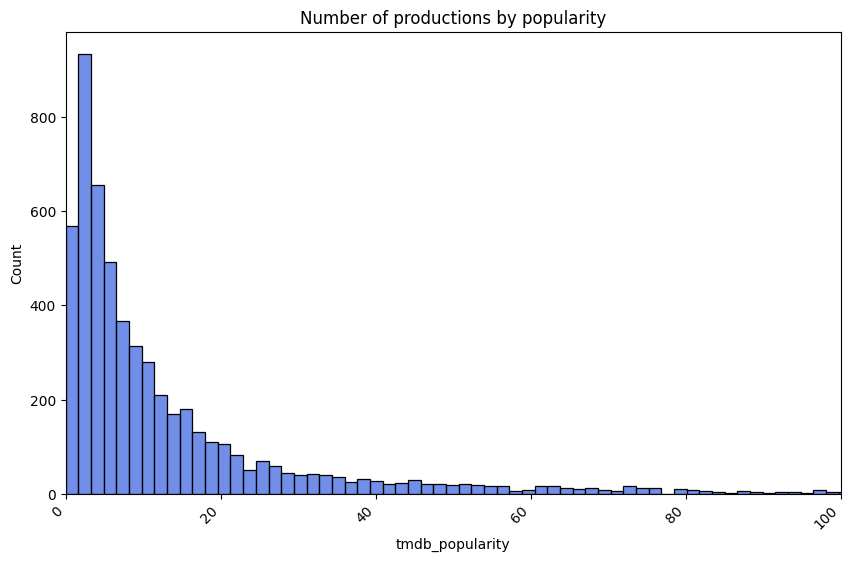

In [6]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45, ha='right')
plt.xlim(0, 100)
sns.histplot(x = df['tmdb_popularity'], color='royalblue').set(title='Number of productions by popularity')

In [7]:
print(min(df['tmdb_popularity']))
print(max(df['tmdb_popularity']))
print((df['tmdb_popularity']).mean())
df.info()

0.0094417458789051
1823.374
22.525659725795848
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            548

## Date of release to Scores and Popularity

At first, it is smart to make the data less scattered by dividig the years into decades



In [8]:
def get_decade(val):
    return int(str(val)[:-1] + "0")

df['decade'] = df['release_year'].map(get_decade)
df['decade'].value_counts()

2010    3399
2020    1780
2000     397
1990     133
1980      56
1970      23
1960      11
1950       6
1940       1
Name: decade, dtype: int64

In [9]:
df_clean = df[(~df['imdb_score'].isnull()) & (~df['tmdb_score'].isnull())]
df_1 = df_clean.copy()
decade_ratings_relations = df_1.groupby('decade').aggregate({"imdb_score": "mean", "tmdb_score": "mean", 'tmdb_popularity': 'mean'})

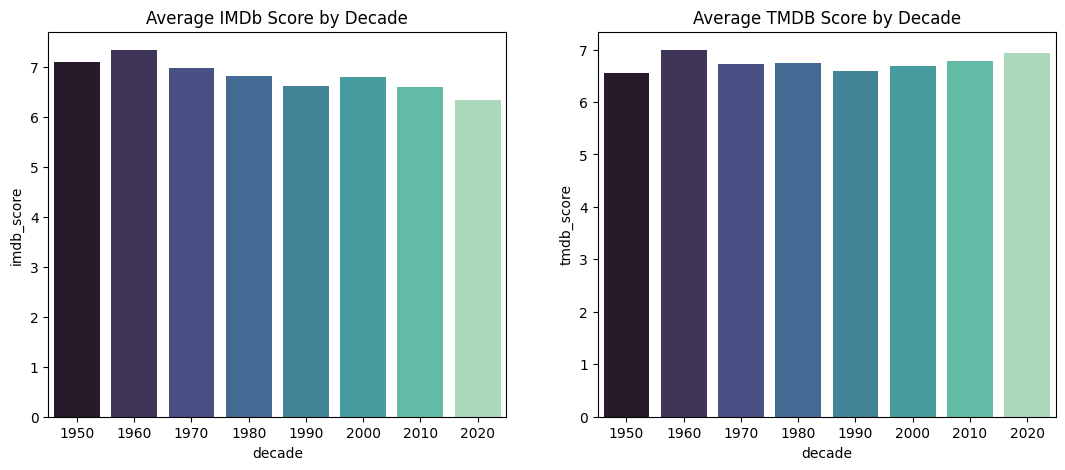

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

sns.barplot(x=decade_ratings_relations.index, y=decade_ratings_relations["imdb_score"], palette='mako', ax=axes[0])
axes[0].set_title("Average IMDb Score by Decade")

sns.barplot(x=decade_ratings_relations.index, y=decade_ratings_relations["tmdb_score"], palette='mako', ax=axes[1])
axes[1].set_title("Average TMDB Score by Decade")

plt.show()

It's quite transparent that the IMDb score indicates that the older the series, the more popular it is. A complete opposite is outlined with TMDb scores: the younger the series or movie, the more popular it is. To ensure that the assumption is correct, it's worth creating a plot with linear regression.

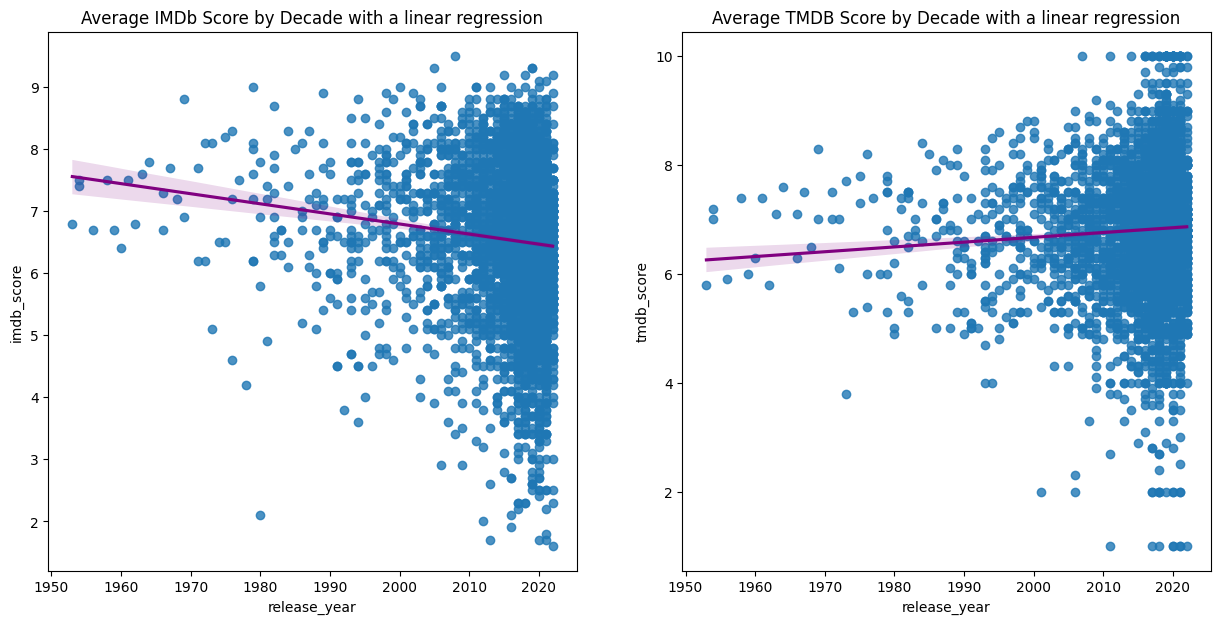

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.regplot(x=df_1['release_year'], y=df_1['imdb_score'], line_kws={"color": "purple"}, ax=axes[0])
axes[0].set_title("Average IMDb Score by Decade with a linear regression")

sns.regplot(x=df_1['release_year'], y=df_1['tmdb_score'], line_kws={"color": "purple"}, ax=axes[1])
axes[1].set_title("Average TMDB Score by Decade with a linear regression")

plt.show()

The plots outline the exact predictions formed in the previous analysis. Therefore, in order to seek further correlation, the following plots will depict TMDb popularity by decades.

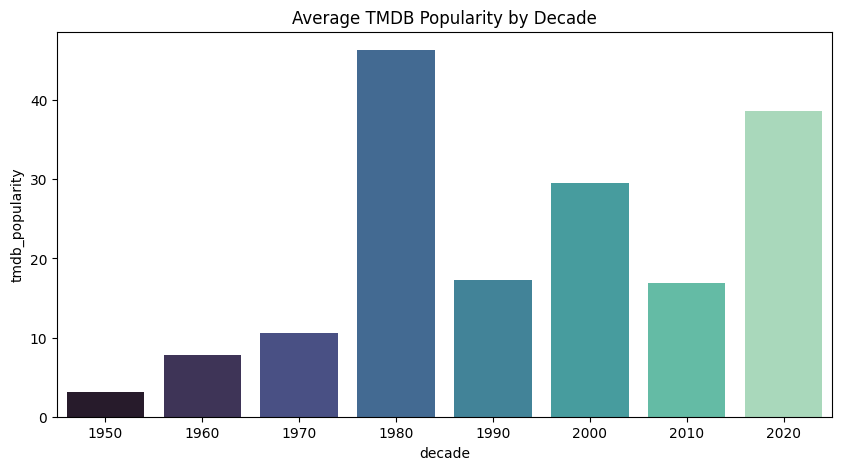

In [12]:
plt.figure(figsize=(10, 5))
sns.barplot(x=decade_ratings_relations.index, y=decade_ratings_relations["tmdb_popularity"], palette='mako')
plt.title("Average TMDB Popularity by Decade")

plt.show()

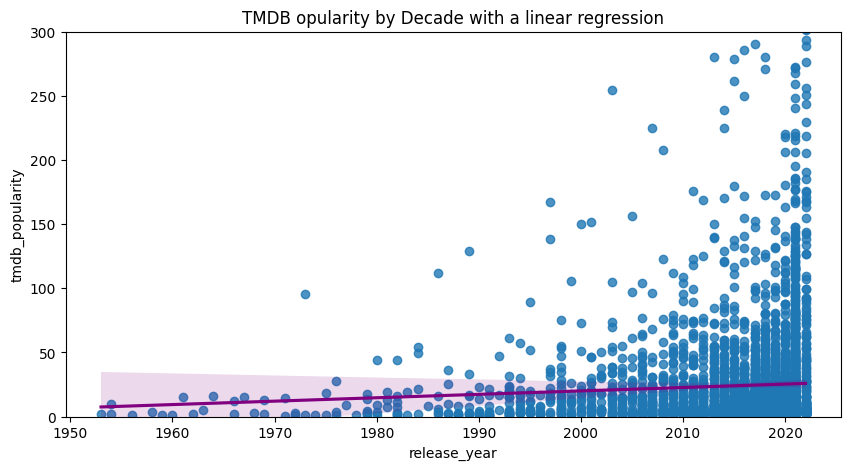

In [13]:
plt.figure(figsize=(10, 5))
sns.regplot(x=df_1['release_year'], y=df_1['tmdb_popularity'], line_kws={"color": "purple"}).set(title="TMDB opularity by Decade with a linear regression")
plt.ylim(0, 300)
plt.show()

The plots outline a drastic change in popularity over time. However, the 80s stand as an exception, with their series being the most popular among the dataset. Given this information, there is no need for a linear regression plot, as it would be messy and the conclusion can be drawn from the existing plots.

### Conclusion for Date of release to Scores and Popularity

There is no definite corelation between production's scores and it's ratings. On the other hand, popularity has transparent tendency of increasing by the time, making date a good candidate for our our model.

## Age Certification to Scores and Popularity

In [14]:
df_2 = df_clean.copy()
age_ratings_relations = df_2.groupby('age_certification').aggregate({"imdb_score": "mean", "tmdb_score": "mean", 'tmdb_popularity': 'mean'})

In [15]:
df_1['age_certification'].value_counts()

TV-MA    773
R        547
PG-13    420
TV-14    413
PG       236
TV-PG    160
TV-Y7     98
G         95
TV-Y      83
TV-G      71
NC-17     13
Name: age_certification, dtype: int64

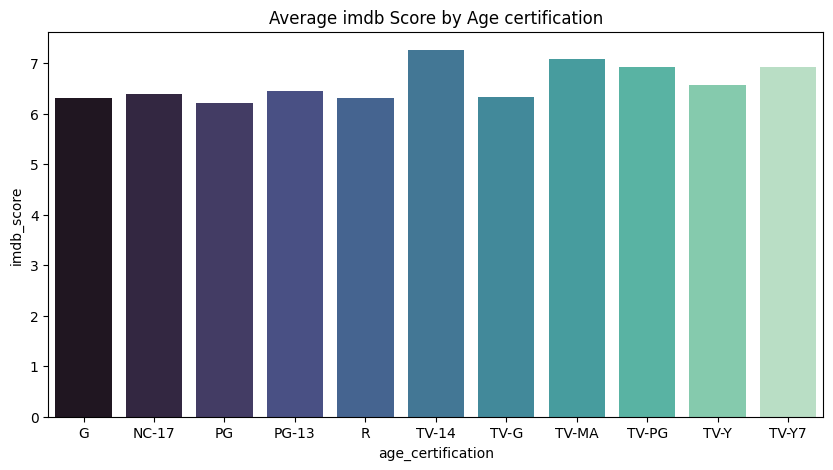

[Text(0.5, 1.0, 'Average tmdb Score by Age certification')]

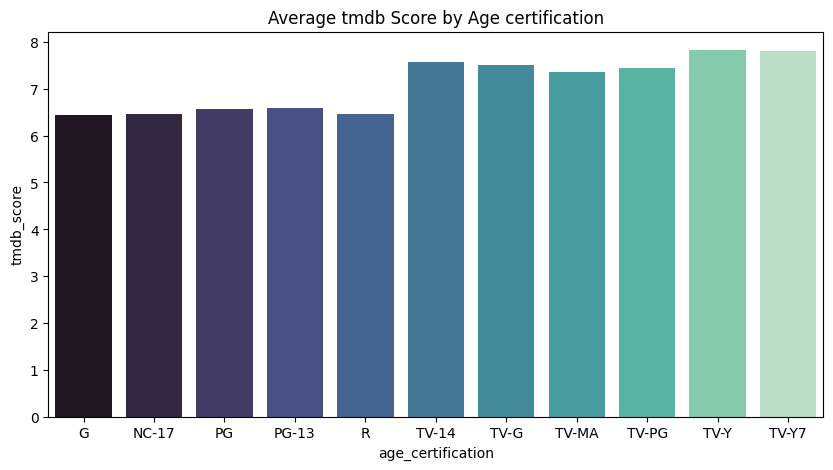

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x=age_ratings_relations.index, y=age_ratings_relations["imdb_score"], palette='mako').set(title='Average imdb Score by Age certification')

plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=age_ratings_relations.index, y=age_ratings_relations["tmdb_score"], palette='mako').set(title='Average tmdb Score by Age certification')

[Text(0.5, 1.0, 'Average tmdb Popularity by Age certification')]

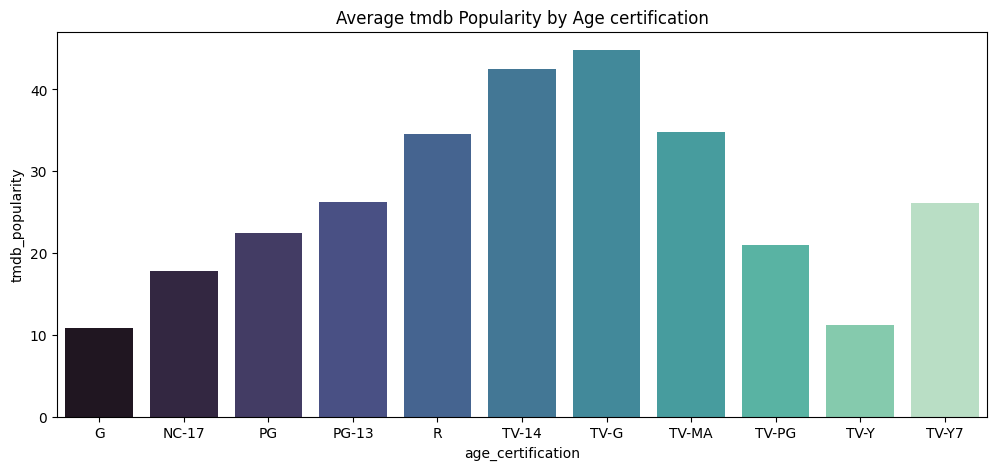

In [17]:
plt.figure(figsize=(12, 5))
sns.barplot(x=age_ratings_relations.index, y=age_ratings_relations["tmdb_popularity"], palette='mako').set(title='Average tmdb Popularity by Age certification')

The plot outlines greater popularity of TV-G, TV-14, R and TV-MA productions. It's quite logical that productions for general audience are the most popular. The least popular is TV-Y indicating production suitable for all children.

## Conclusions for Age Certification to Scores and Popularity

The age certification doesn't seem to affect the scores in any way. The popularity, on the other hand, is strongly corelated to age certification, therefore such indicator can come in handy for the model.

#Genere to Scores and Popularity

As displayed bellow, there is a slight problem with 'genres' collumn. It contains more than one value.

In [18]:
df['genres'].value_counts()

['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: genres, Length: 1626, dtype: int64

In this case we will have to drop the latter generes, and stick with the first one. The first appearing genre describes the movie more.

In [19]:
def drop_genre(record):
    genres = record[1:-1].split(',')

    for i in range(len(genres)):
        genres[i] = genres[i].strip()[1:-1]

    return genres[0] if genres[0] != '' else 'None'

In [20]:
df['genres_transformed'] = df['genres'].map(drop_genre)
df['genres_transformed'].value_counts()

drama            1432
comedy           1310
documentation     588
thriller          442
action            292
scifi             289
romance           265
crime             254
animation         232
reality           176
fantasy           143
horror            121
None               68
family             66
music              50
war                43
western            22
history             9
sport               4
Name: genres_transformed, dtype: int64

Now let's display the number of generes

[Text(0.5, 1.0, 'Number of productions for each genre')]

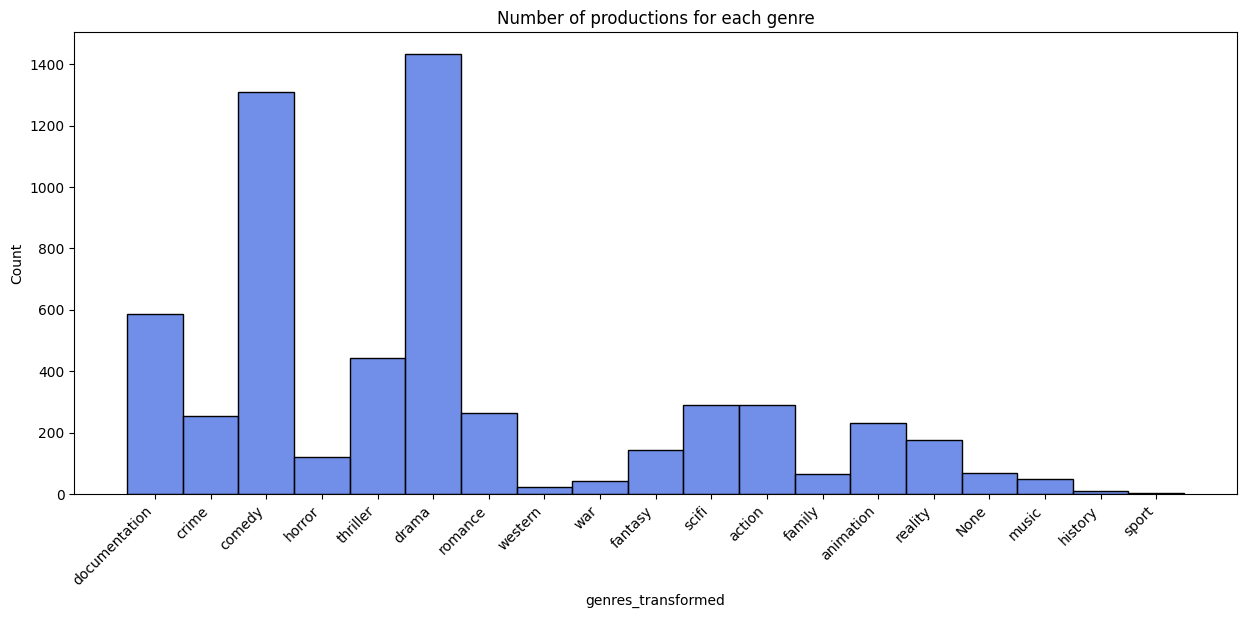

In [21]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45, ha='right')
sns.histplot(x = df['genres_transformed'], color='royalblue').set(title='Number of productions for each genre')

In [22]:
df_3 = df[(~df['imdb_score'].isnull()) & (~df['tmdb_score'].isnull())]
generes_ratings_relations = df_3.groupby('genres_transformed').aggregate({"imdb_score": "mean", "tmdb_score": "mean", 'tmdb_popularity': 'mean'})
generes_ratings_relations.head()

,imdb_score,tmdb_score,tmdb_popularity
genres_transformed,,,
None,7.100000,7.333333,4.852000
action,6.524906,7.027170,45.798860
animation,6.561350,7.222086,17.362252
comedy,6.357191,6.604399,15.003196
crime,6.729412,6.887395,24.526845


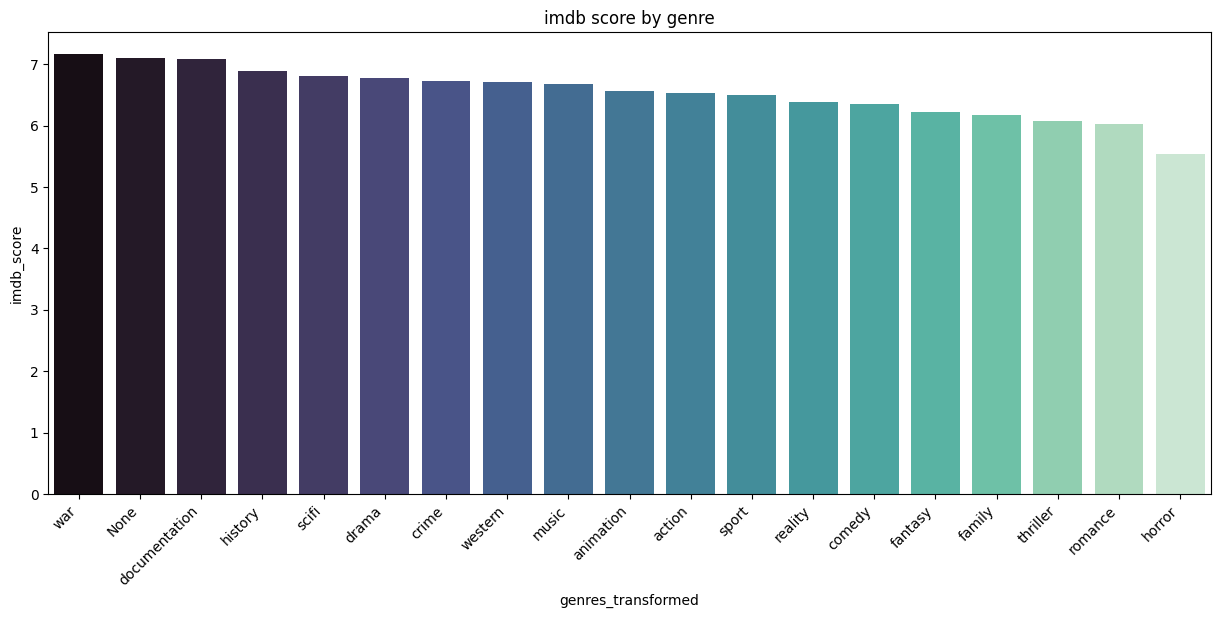

In [23]:
sorted_imdb = generes_ratings_relations.sort_values(by="imdb_score", ascending=False)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45, ha='right')
sns.barplot(x=sorted_imdb.index, y=sorted_imdb["imdb_score"], palette='mako').set(title='imdb score by genre')
plt.show()

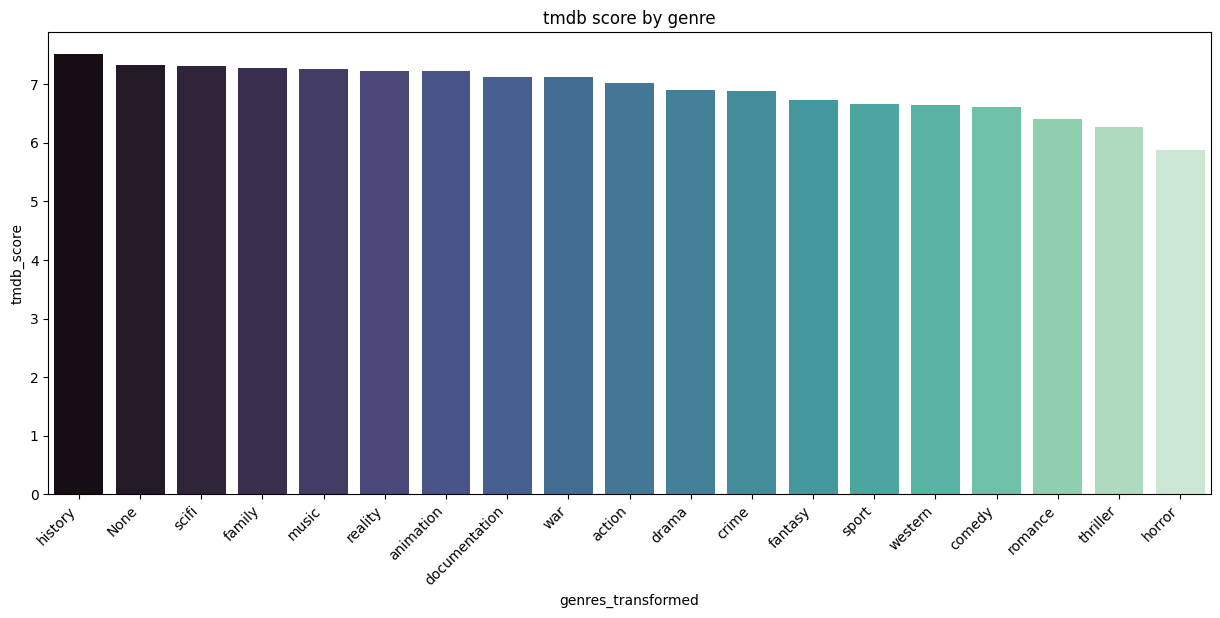

In [24]:
sorted_tmdb = generes_ratings_relations.sort_values(by="tmdb_score", ascending=False)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45, ha='right')
sns.barplot(x=sorted_tmdb.index, y=sorted_tmdb["tmdb_score"], palette='mako').set(title='tmdb score by genre')
plt.show()

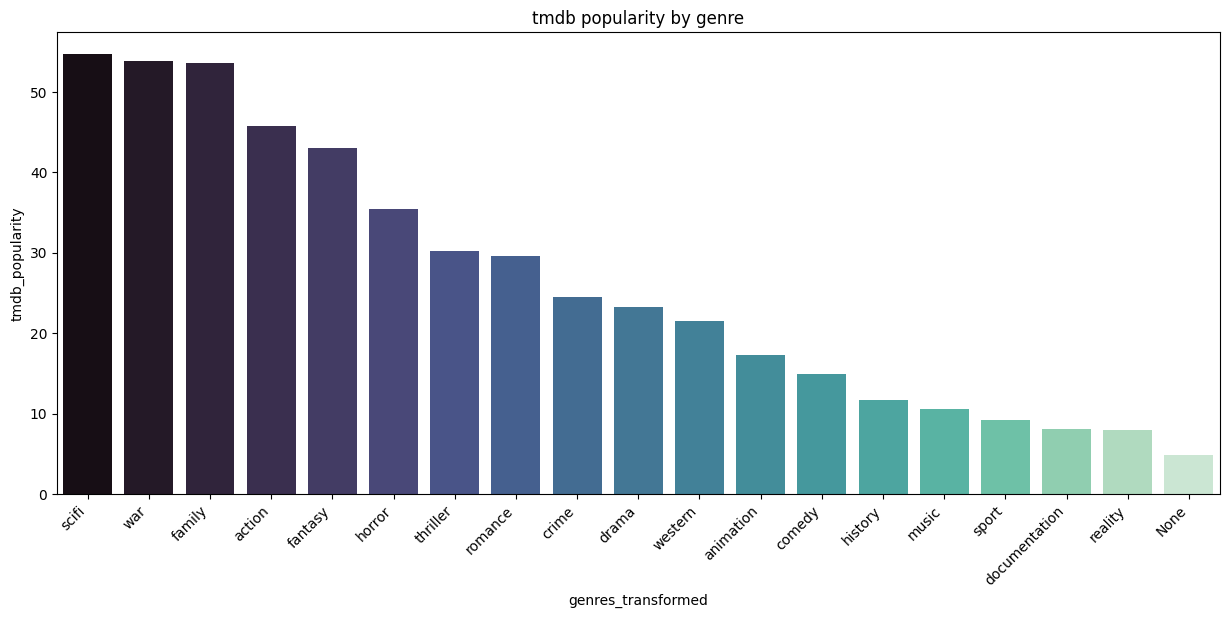

In [25]:
sorted_tmdb = generes_ratings_relations.sort_values(by="tmdb_popularity", ascending=False)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45, ha='right')
sns.barplot(x=sorted_tmdb.index, y=sorted_tmdb["tmdb_popularity"], palette='mako').set(title='tmdb popularity by genre')
plt.show()

The difference in ratings for each of the genre has some corelation. It's subtle but noticible. On the other hand the popularity of each genre is very disctinctive. Scifi, war and family productions are soaring on the plot, while the oposite goes for sports, documentations and reality productions.

## Conclusions for genre to Scores and Popularity
Genre influences the rating in a slight way, conversely, genre stronly influences the popularity, almost determines it.

# Production Country to Scores and Popularity

Similar problem arrises with the production countries column, as it has more than one value

In [26]:
df['production_countries']

0             ['US']
1             ['US']
2             ['GB']
3             ['GB']
4             ['US']
            ...     
5801          ['NG']
5802              []
5803    ['NG', 'CA']
5804              []
5805              []
Name: production_countries, Length: 5806, dtype: object

In [27]:
def drop_production_countries(record):
    countries = record[1:-1].split(',')

    for i in range(len(countries)):
        countries[i] = countries[i].strip()[1:-1]

    return countries[0] if countries[0] != '' else 'None'

In [28]:
df['production_countries_transformed'] = df['production_countries'].map(drop_genre)
df['production_countries_transformed'].value_counts()

US      2087
IN       619
GB       304
JP       277
None     232
        ... 
GL         1
SY         1
HR         1
SK         1
NA         1
Name: production_countries_transformed, Length: 96, dtype: int64

[Text(0.5, 1.0, 'Number of Production Countries'),
 Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Number of Productions')]

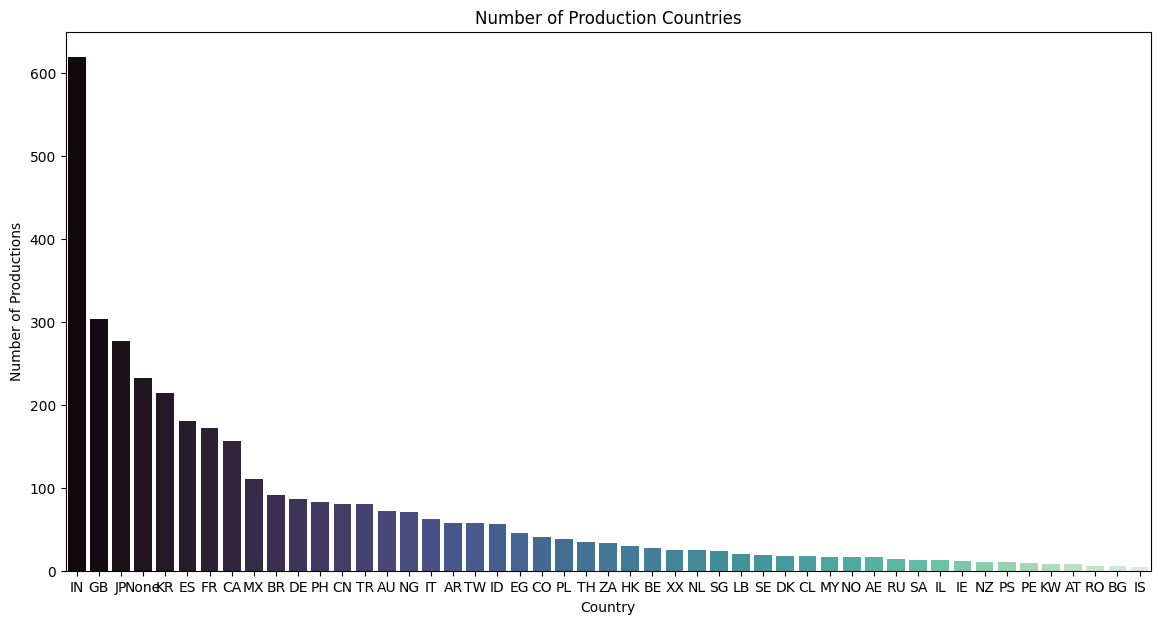

In [29]:
plt.figure(figsize=(14, 7))
sns.barplot(x=df['production_countries_transformed'].value_counts()[1:50].index, y=df['production_countries_transformed'].value_counts()[1:50], palette='mako').set(title='Number of Production Countries', xlabel='Country', ylabel='Number of Productions')

The top 10 countries make up for approximately 90% of the productions. The top ones being India, Great Britan, Japan, Korea, Spain and France

In [30]:
df_4 = df[(~df['imdb_score'].isnull()) & (~df['tmdb_score'].isnull())]
production_countries_ratings_relations = df_4.groupby('production_countries_transformed').aggregate({"imdb_score": "mean", "tmdb_score": "mean", 'tmdb_popularity': 'mean'})
production_countries_ratings_relations.head()

,imdb_score,tmdb_score,tmdb_popularity
production_countries_transformed,,,
AE,5.510000,5.580000,4.070200
AF,7.700000,6.500000,4.250000
AO,3.900000,5.600000,9.692000
AR,6.415385,6.905769,17.022481
AT,5.614286,5.900000,5.388714


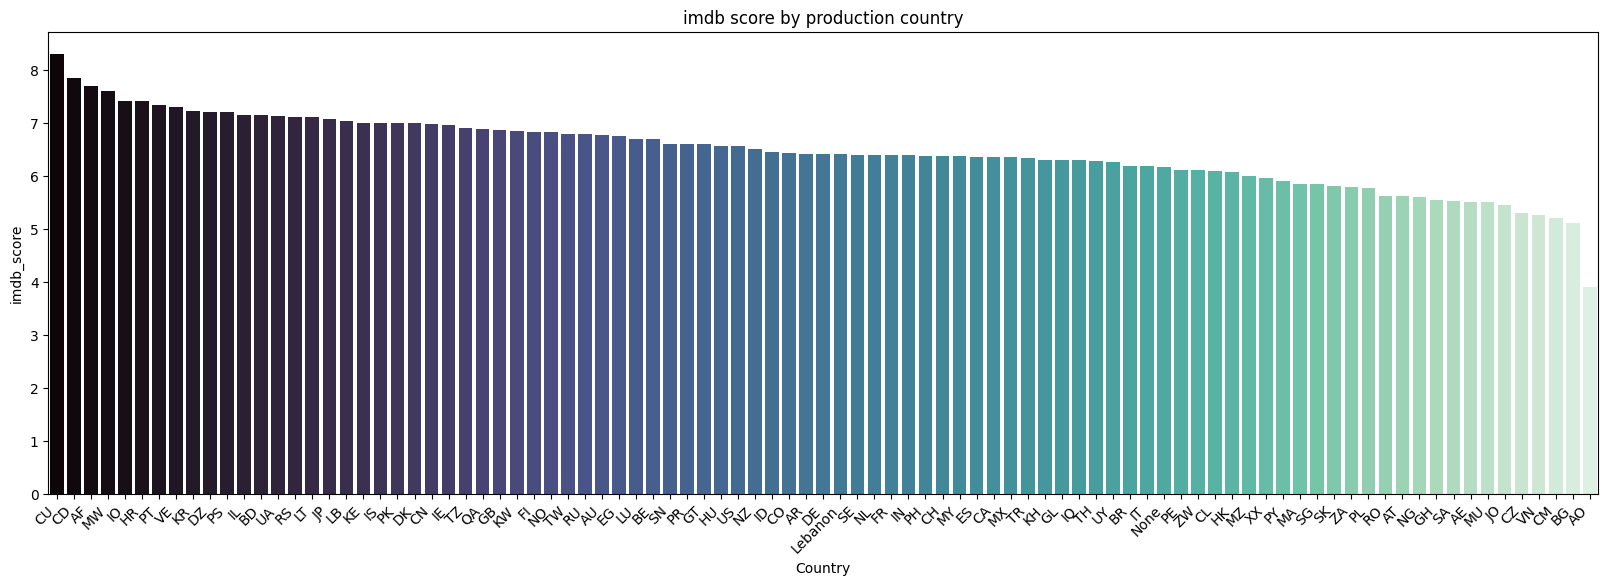

In [31]:
sorted_imdb = production_countries_ratings_relations.sort_values(by="imdb_score", ascending=False)
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45, ha='right')
sns.barplot(x=sorted_imdb.index, y=sorted_imdb["imdb_score"], palette='mako').set(title='imdb score by production country', xlabel='Country')
plt.show()

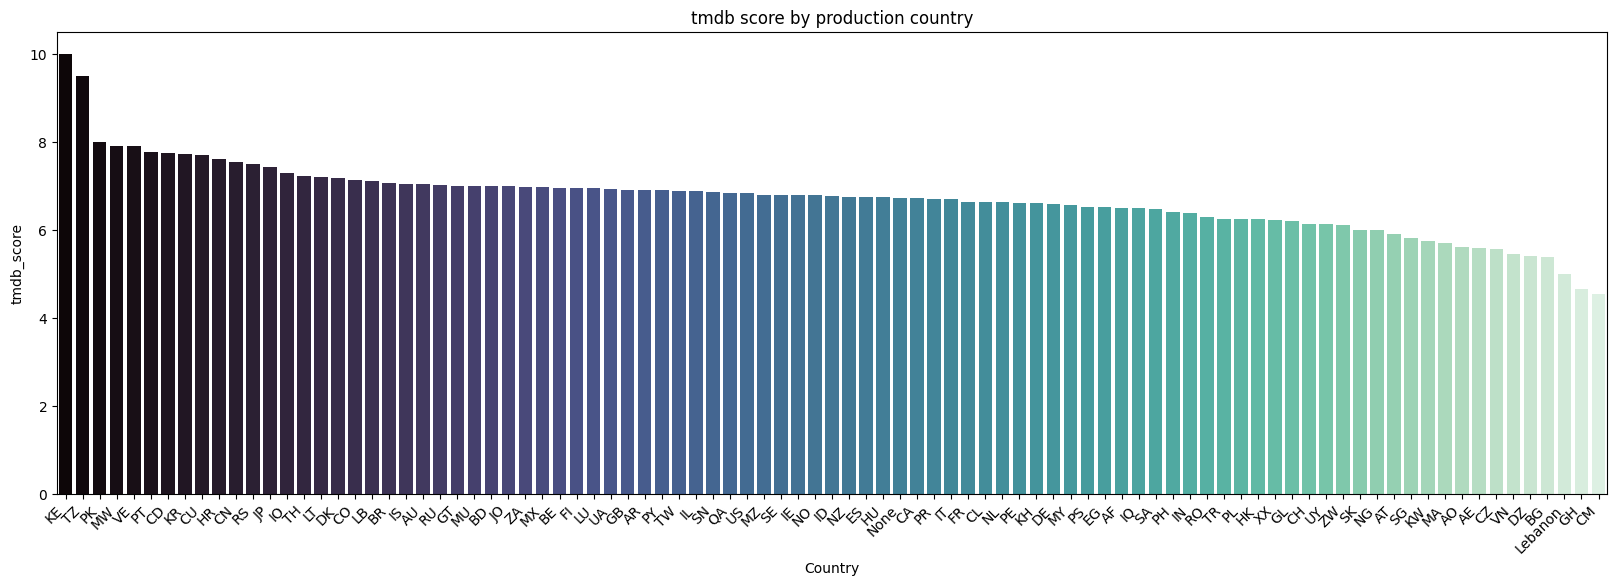

In [32]:
sorted_tmdb = production_countries_ratings_relations.sort_values(by="tmdb_score", ascending=False)
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45, ha='right')
sns.barplot(x=sorted_tmdb.index, y=sorted_tmdb["tmdb_score"], palette='mako').set(title='tmdb score by production country', xlabel='Country')
plt.show()

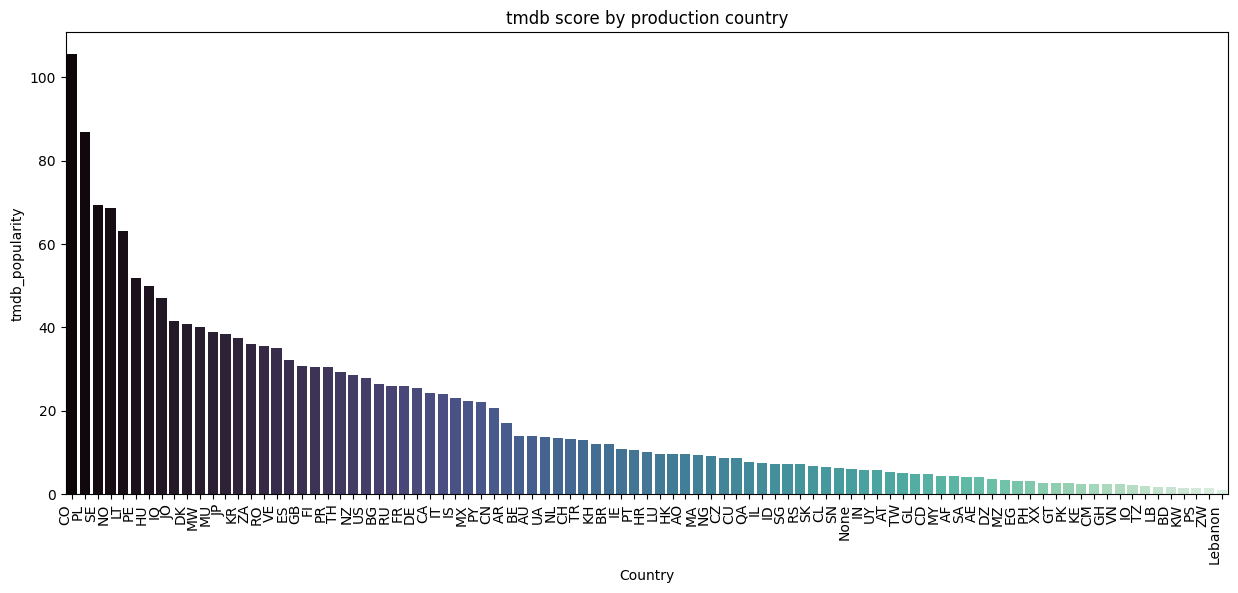

In [33]:
sorted_tmdb = production_countries_ratings_relations.sort_values(by="tmdb_popularity", ascending=False)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90, ha='right')
sns.barplot(x=sorted_tmdb.index, y=sorted_tmdb["tmdb_popularity"], palette='mako').set(title='tmdb score by production country', xlabel='Country')
plt.show()

It becomes noticible that countries with not many productions have outstanding scores, while are having close to none popularity. In such case a smart move would be to get rid of the countries that have less than 10 productions.

In [34]:
cleaned_countries = df['production_countries_transformed'].value_counts()[df['production_countries_transformed'].value_counts() > 10].index.values
df_prod_accepted = df[df['production_countries_transformed'].isin(cleaned_countries)].groupby("production_countries_transformed").aggregate({"imdb_score": "mean", "tmdb_score": "mean", "tmdb_popularity": "mean"})
df_prod_accepted.head()

,imdb_score,tmdb_score,tmdb_popularity
production_countries_transformed,,,
AE,5.335714,5.580000,3.171571
AR,6.379245,6.789286,15.722862
AU,6.730435,7.095588,13.166361
BE,6.700000,6.853571,13.879964
BR,6.154023,7.111364,11.959333


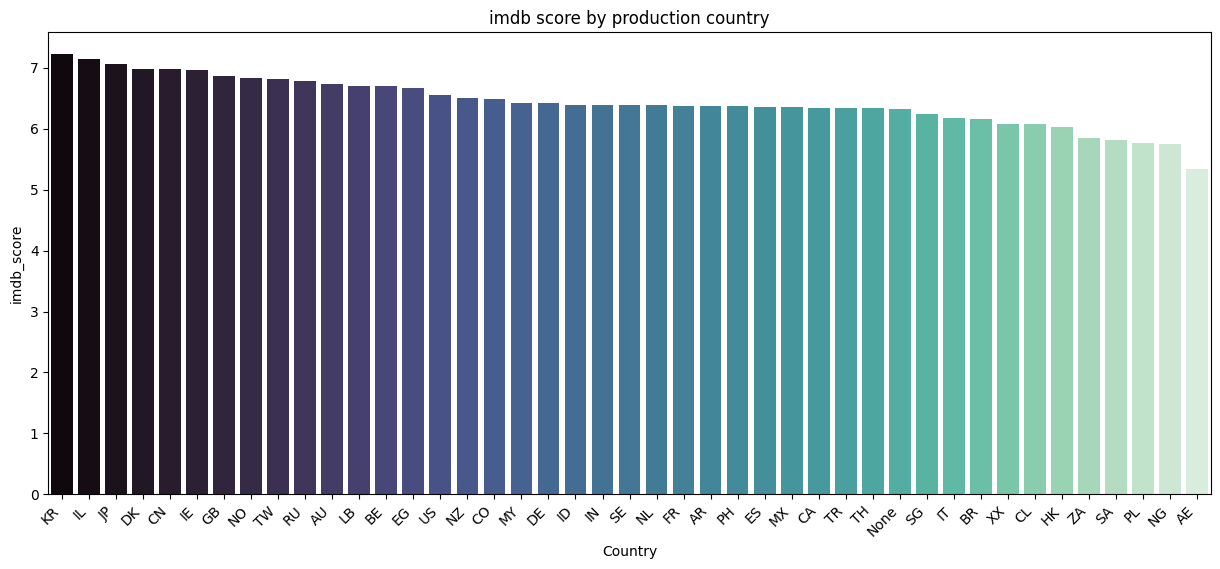

In [35]:
sorted_imdb = df_prod_accepted.sort_values(by="imdb_score", ascending=False)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45, ha='right')
sns.barplot(x=sorted_imdb.index, y=sorted_imdb["imdb_score"], palette='mako').set(title='imdb score by production country', xlabel='Country')
plt.show()

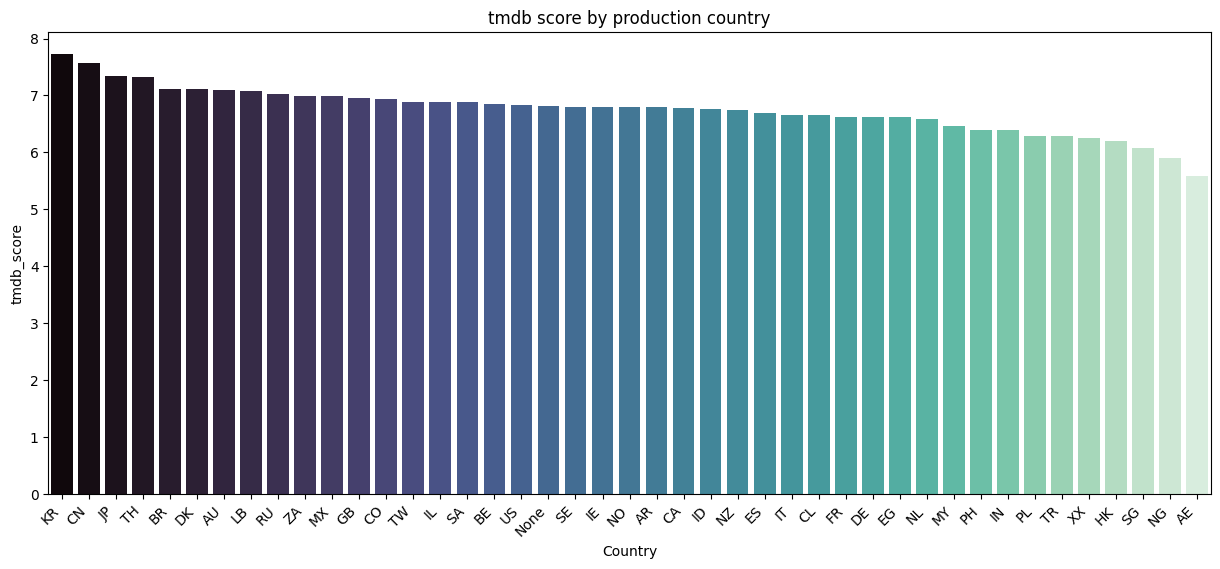

In [36]:
sorted_tmdb = df_prod_accepted.sort_values(by="tmdb_score", ascending=False)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45, ha='right')
sns.barplot(x=sorted_tmdb.index, y=sorted_tmdb["tmdb_score"], palette='mako').set(title='tmdb score by production country', xlabel='Country')
plt.show()

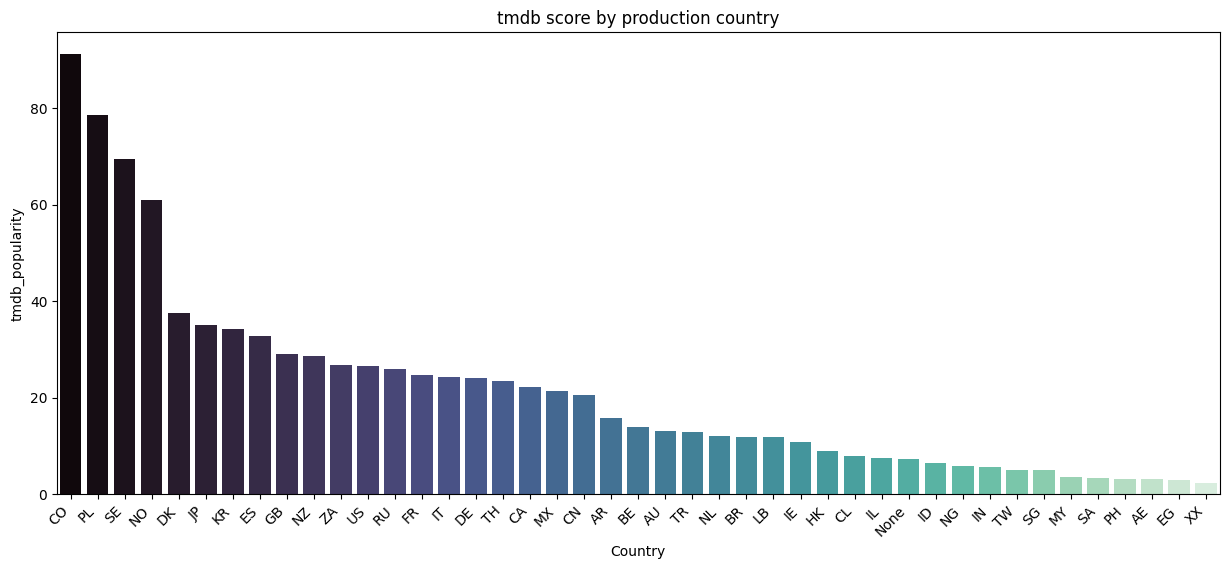

In [37]:
sorted_tmdb = df_prod_accepted.sort_values(by="tmdb_popularity", ascending=False)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45, ha='right')
sns.barplot(x=sorted_tmdb.index, y=sorted_tmdb["tmdb_popularity"], palette='mako').set(title='tmdb score by production country', xlabel='Country')
plt.show()

## Conclusion for production country to scores and popularity

After cleaning the data Colombia and Poland are still outlined as the most popular production countries. The scores became way more transparent and do not differ much over the course of data. This process allowed us to compare the countries that have adequate amount of productions for this experiment and thanks to such process we finaly derived a reasonable plot displaying the scores. It displays that Korea and Japan and Canada are the best when it comes to creating productions in both imdb and tmdb

## Seeking for corelations between Populatity and Scores in countries with more than 10 productions

[Text(0.5, 1.0, 'Headmap of corelations')]

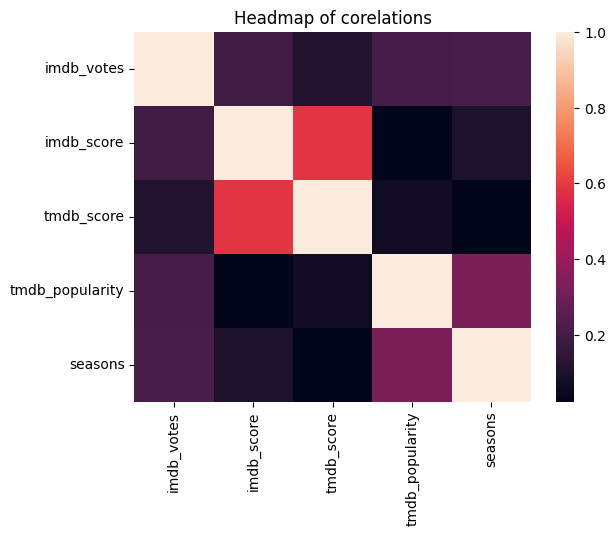

In [38]:
sns.heatmap(df[['imdb_votes', 'imdb_score', 'tmdb_score', 'tmdb_popularity', 'seasons']].corr()).set(title='Headmap of corelations')

[Text(0.5, 1.0, 'Regression plot for corelation between imdb and tmdb scores')]

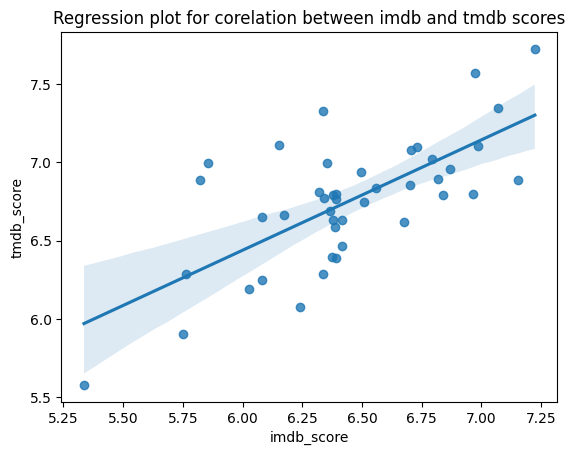

In [39]:
sns.regplot(x=df_prod_accepted['imdb_score'], y=df_prod_accepted['tmdb_score']).set(title='Regression plot for corelation between imdb and tmdb scores')

## Seeking in corelation between imdb_votes and tmdb_popularity

[Text(0.5, 1.0, 'Regression plot for corelation between imdb and tmdb scores')]

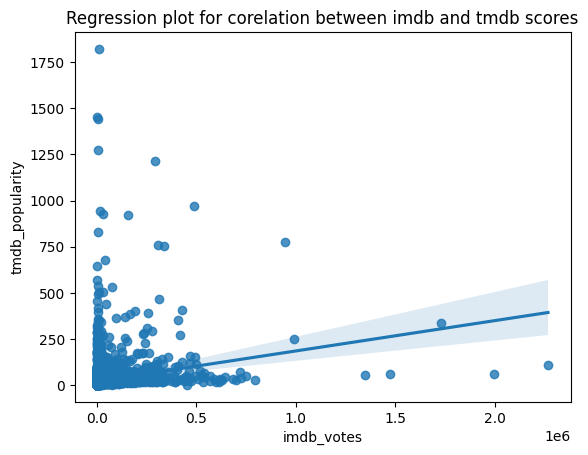

In [40]:
sns.regplot(x=df['imdb_votes'], y=df['tmdb_popularity']).set(title='Regression plot for corelation between imdb and tmdb scores')

# Data Preprocessing

Let's start off by creating a final dataframe on which we will be creating models.

In [41]:
df_cleaned = df[(~df['imdb_score'].isnull()) & (~df['tmdb_score'].isnull()) & (~df['tmdb_popularity'].isnull())]
df_processed = df_cleaned.copy()
df_processed.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,decade,genres_transformed,production_countries_transformed
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,1970,crime,US
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,1970,comedy,GB
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8,1970,comedy,GB
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,1970,horror,US
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3,1960,comedy,GB


droping unnecesary columns

In [42]:
columns_to_drop = ['id', 'title', 'description', 'imdb_id', 'runtime']
for column in columns_to_drop:
    df_processed.drop(column, inplace=True, axis=1)

In [43]:
df_processed['is_movie'] = df_processed.type.map(lambda x: 0 if x == 'SHOW' else 1)
df_processed.head()

,type,release_year,age_certification,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,decade,genres_transformed,production_countries_transformed,is_movie
1,MOVIE,1976,R,"['crime', 'drama']",['US'],NaN,8.3,795222.0,27.612,8.2,1970,crime,US,1
2,MOVIE,1975,PG,"['comedy', 'fantasy']",['GB'],NaN,8.2,530877.0,18.216,7.8,1970,comedy,GB,1
3,MOVIE,1979,R,['comedy'],['GB'],NaN,8.0,392419.0,17.505,7.8,1970,comedy,GB,1
4,MOVIE,1973,R,['horror'],['US'],NaN,8.1,391942.0,95.337,7.7,1970,horror,US,1
5,SHOW,1969,TV-14,"['comedy', 'european']",['GB'],4.0,8.8,72895.0,12.919,8.3,1960,comedy,GB,0


It's noticible that popularity is highly scattered from 0 to 100, therefore it will be easier to convert it into more subtle values

In [44]:
df_processed.isnull().sum()

type                                   0
release_year                           0
age_certification                   2146
genres                                 0
production_countries                   0
seasons                             3269
imdb_score                             0
imdb_votes                            14
tmdb_popularity                        0
tmdb_score                             0
decade                                 0
genres_transformed                     0
production_countries_transformed       0
is_movie                               0
dtype: int64

In [45]:
df_processed['age_certification'].fillna("N/A", inplace=True)
df_processed['seasons'].fillna(0.0, inplace=True)
df_processed['imdb_votes'].fillna(df_processed['imdb_votes'].mean(), inplace=True)
df_processed.isnull().sum()

type                                0
release_year                        0
age_certification                   0
genres                              0
production_countries                0
seasons                             0
imdb_score                          0
imdb_votes                          0
tmdb_popularity                     0
tmdb_score                          0
decade                              0
genres_transformed                  0
production_countries_transformed    0
is_movie                            0
dtype: int64

In [46]:
df_model = pd.get_dummies(df_processed[['decade', 'age_certification', 'genres_transformed', 'production_countries_transformed', 'imdb_votes', 'seasons', 'is_movie']])

# Model Creating

Splitting the datasets into test and training data

In [47]:
X = df_model.copy()
y = df_processed.pop('tmdb_popularity')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

Creating a function for rating out models

In [48]:
def score_dataset(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {"mean_squared_error": mean_squared_error(y_test, y_pred), "mean_absolute_error": mean_absolute_error(y_test, y_pred), "mean_absolute_percentage_error": mean_absolute_percentage_error(y_test, y_pred)}

Creating different models of random forest with different parameters

In [49]:
rf_1 = RandomForestRegressor(n_estimators=300, max_features='sqrt', random_state=0)
rf_2 = RandomForestRegressor(n_estimators=300, max_features='log2', random_state=0)
rf_3 = RandomForestRegressor(n_estimators=300, random_state=0)
rf_4 = RandomForestRegressor(n_estimators=100, random_state=0)
rf_5 = RandomForestRegressor(n_estimators=200, random_state=0)
rf_6 = RandomForestRegressor(n_estimators=750, random_state=0)

The rf_2 turned the best results, therefore I will be using it to compare with other models

In [50]:
print('rf 1', score_dataset(X_train, X_test, y_train, y_test, model=rf_1))
print('rf 2', score_dataset(X_train, X_test, y_train, y_test, model=rf_2))
print('rf 3', score_dataset(X_train, X_test, y_train, y_test, model=rf_3))
print('rf 4', score_dataset(X_train, X_test, y_train, y_test, model=rf_4))
print('rf 5', score_dataset(X_train, X_test, y_train, y_test, model=rf_5))
print('rf 6', score_dataset(X_train, X_test, y_train, y_test, model=rf_6))

rf 1 {'mean_squared_error': 2437.2691153435353, 'mean_absolute_error': 16.53886423124205, 'mean_absolute_percentage_error': 1.506284195823098}
rf 2 {'mean_squared_error': 2457.8344433216025, 'mean_absolute_error': 16.90070486594681, 'mean_absolute_percentage_error': 1.5645504999246904}
rf 3 {'mean_squared_error': 2615.031286967209, 'mean_absolute_error': 16.53861586352111, 'mean_absolute_percentage_error': 1.4044144882198804}
rf 4 {'mean_squared_error': 2655.3913376342944, 'mean_absolute_error': 16.553117319214827, 'mean_absolute_percentage_error': 1.4045207984236132}
rf 5 {'mean_squared_error': 2656.3468631622773, 'mean_absolute_error': 16.646452493394094, 'mean_absolute_percentage_error': 1.4158385414058303}
rf 6 {'mean_squared_error': 2628.6892719573952, 'mean_absolute_error': 16.57816959197714, 'mean_absolute_percentage_error': 1.4026363019182966}


In [51]:
rf = rf_2

Creating LinearRegression model

In [52]:
linreg = LinearRegression()

In [53]:
print('linear regression', score_dataset(X_train, X_test, y_train, y_test, model=linreg))

linear regression {'mean_squared_error': 2630.990400588828, 'mean_absolute_error': 23.498117467883713, 'mean_absolute_percentage_error': 3.579110079913535}


Creating different models of SVR with different parameters.

In [54]:
svr_1_1 = SVR(kernel='rbf', C=1.0)
svr_1_2 = SVR(kernel='rbf', C=2.0)
svr_2_1 = SVR(kernel='poly', C=1.0)
svr_2_2 = SVR(kernel='poly', C=2.0)
svr_3_1 = SVR(kernel='sigmoid', C=1.0)
svr_3_2 = SVR(kernel='sigmoid', C=2.0)

The svr_1_2 turned the best results, therefore I wil be using it to compare with other models

In [55]:
print('SVR_1_1', score_dataset(X_train, X_test, y_train, y_test, model=svr_1_1))
print('SVR_1_2', score_dataset(X_train, X_test, y_train, y_test, model=svr_1_2))
print('SVR_2_1', score_dataset(X_train, X_test, y_train, y_test, model=svr_2_1))
print('SVR_2_2', score_dataset(X_train, X_test, y_train, y_test, model=svr_2_2))
print('SVR_3_1', score_dataset(X_train, X_test, y_train, y_test, model=svr_3_1))
print('SVR_3_2', score_dataset(X_train, X_test, y_train, y_test, model=svr_3_2))

SVR_1_1 {'mean_squared_error': 2844.1544530104056, 'mean_absolute_error': 15.245097962237084, 'mean_absolute_percentage_error': 0.8692607712084083}
SVR_1_2 {'mean_squared_error': 2827.4944753230416, 'mean_absolute_error': 15.173640505041048, 'mean_absolute_percentage_error': 0.8463348650170233}
SVR_2_1 {'mean_squared_error': 2977.3668911698282, 'mean_absolute_error': 16.66313950364361, 'mean_absolute_percentage_error': 1.2663434092634693}
SVR_2_2 {'mean_squared_error': 2948.225482784993, 'mean_absolute_error': 16.584860921784024, 'mean_absolute_percentage_error': 1.2583690648262746}
SVR_3_1 {'mean_squared_error': 6239.883569526086, 'mean_absolute_error': 27.99119793991855, 'mean_absolute_percentage_error': 1.7223624246056295}
SVR_3_2 {'mean_squared_error': 19763.07884126711, 'mean_absolute_error': 50.83217454945842, 'mean_absolute_percentage_error': 3.494586321243106}


In [56]:
svr = svr_1_2

In [57]:
models = [rf, linreg, svr]

In [58]:
def get_metrics_results(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return [mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_absolute_percentage_error(y_test, y_pred)]

In [59]:
random_forest_results = get_metrics_results(X_train, X_test, y_train, y_test, model=rf)
linear_regression_results = get_metrics_results(X_train, X_test, y_train, y_test, model=linreg)
svr_results = get_metrics_results(X_train, X_test, y_train, y_test, model=svr)

In [60]:
results = [
    ['Random Forest', random_forest_results[0], random_forest_results[1], random_forest_results[2]],
    ['Linear Reg', linear_regression_results[0], linear_regression_results[1], linear_regression_results[2]],
    ['SVR', svr_results[0], svr_results[1], svr_results[2]]
]

results.sort(key = lambda model: model[3])
results = pd.DataFrame(data=results, columns=['Model', 'mse', 'mae', 'mape'])
results

,Model,mse,mae,mape
0,SVR,2827.494475,15.173641,0.846335
1,Random Forest,2457.834443,16.900705,1.564550
2,Linear Reg,2630.990401,23.498117,3.579110


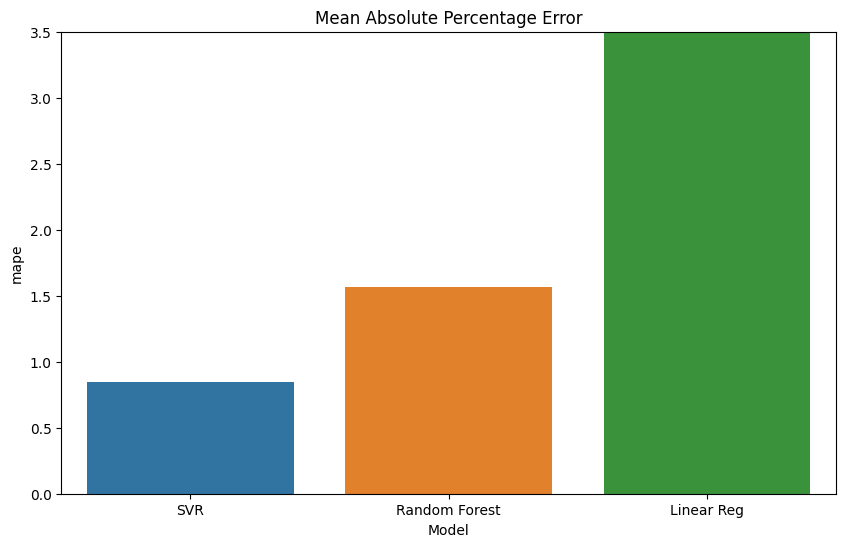

In [61]:
plt.figure(figsize=(10,6))
plot=sns.barplot(x='Model', y='mape', data=results)
plot.set(ylim=(0, 3.5), title='Mean Absolute Percentage Error')
plt.show()